#**Sistema de línea de espera con dos servidores en serie**

# Librerias

In [9]:
import random as rnd
import math 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros

- Generar aleatorios para los tiempos de entre llegadas ( Exponencial )
- Generar aleatorios para los tiempos de atención ( Exponencial )
- Declarar un tiempo T, donde no se permitan más llegadas
- Para calcular el tiempo de espera: **salida - ( llegada + atencion )**
- Para calcular el tiempo de salida del banco: 
    - Para el primer cliente: **llegada + atencion**
    - Para la llegada > salida del anterior: **llegada + atencion**
    - Para los demas: **salida=salida + atencion**

# Implementación

In [18]:
T = 480 # Tiempo que dura el banco abierto ( 8 horas )
llegada = 0 # tiempo en que llega una persona
n = 0 # Cantidad de personas atendidas
salida = 0 # Tiempo de salida
salida2 = 0
lamda_llegada = 0.5 #30 personas sobre 60 minutos
lamda_atencion = 0.5 #30 personas sobre 60 minutos
lamda_atencion2 = 0.33 #20 personas sobre 60 minutos

entre_llegadas = [] # Lista para guardar el tiempo que dura en llegar una persona a la otra

llegadas = [] # Lista para guardar los tiempos de llegada
atenciones = [] # Lista para guardar los tiempos de atencion
salidas = [] # Lista para guardar el tiempo de salida de las personas
tiempo_esperas = [] # Lista para guardar el tiempo de espera de las personas
tiempo_total_persona_s1 = [] # Lista para guardar el tiempo total que gastan las personas dentro del banco en el servidor 1

llegada_servidor2=[]
atencion_servidor2=[]
salida_servidor2=[]
tiempo_espera_servidor2=[]
tiempo_total_persona_s2 = []

tiempo_total_persona=[]

while salida2 <= T : 

  #Analizando el servidor 1
  entre_llegada = -(1/lamda_llegada) * math.log( rnd.random() ) # Se generan las entre_llegadas
  atencion = -(1/lamda_atencion) * math.log( rnd.random() ) # Se generan los tiempos de atencion del servidor 1
  llegada += entre_llegada # Se suman los tiempos entre_llegadas para saber el tiempo de cada llegada

  llegadas.append( round(llegada, 3) ) # Se guardan las llegadas
  entre_llegadas.append( round(entre_llegada, 3) ) # Se guardan las entre_llegadas
  atenciones.append( round(atencion, 3) ) # Se guardan los tiempos de atencion

  if salida == 0 :
    salida = llegada + atencion
  else :
    if llegada > salida:
      salida = llegada + atencion
    else :
      salida += atencion

  salidas.append( round(salida, 3) )  
  tiempo_esperas.append( round(salida - ( llegada + atencion ), 3) )
  tiempo_total_persona_s1.append(round(tiempo_esperas[n]+atencion ,3))
  
  n += 1

  #Analizando el servidor 2
  llegada2 = salida
  llegada_servidor2.append(round(salida,3))
  atencion2 = -(1/lamda_atencion2) * math.log( rnd.random() ) 
  atencion_servidor2.append(round(atencion2,3))
  
  if salida2 == 0 :
    salida2 = llegada2 + atencion2
  else :
    if llegada2 > salida2:
      salida2 = llegada2 + atencion2
    else :
      salida2 += atencion2

  salida_servidor2.append(round(salida2,3))
  tiempo_espera_servidor2.append(round(salida2-(llegada2+atencion2),3))
  tiempo_total_persona_s2.append(round(tiempo_espera_servidor2[n-1]+atencion2 ,3))

  tiempo_total_persona.append(tiempo_total_persona_s1[n-1]+tiempo_total_persona_s2[n-1])

In [20]:
data={
    'entre_llegadas':entre_llegadas,
    'llegadas':llegadas,
    'tiempo_esperas_s1':tiempo_esperas,
    'atenciones_s1':atenciones,
    'salidas_s1':salidas,
    'tiempo_total_s1':tiempo_total_persona_s1,
    'llegada_s2':llegada_servidor2,
    'tiempo_esperas_s2': tiempo_espera_servidor2,
    'atencion_s2':atencion_servidor2,
    'salidas_s2': salida_servidor2,
    'tiempo_total_s2':tiempo_total_persona_s2,
    'tiempo_total_persona':tiempo_total_persona,
}
dataframe=pd.DataFrame(data)
dataframe

,entre_llegadas,llegadas,tiempo_esperas_s1,atenciones_s1,salidas_s1,tiempo_total_s1,llegada_s2,tiempo_esperas_s2,atencion_s2,salidas_s2,tiempo_total_s2,tiempo_total_persona
0,11.661,11.661,0.000,1.921,13.582,1.921,13.582,0.000,0.337,13.919,0.337,2.258
1,2.309,13.970,0.000,0.419,14.389,0.419,14.389,0.000,2.878,17.267,2.878,3.297
2,1.728,15.698,0.000,0.553,16.250,0.553,16.250,1.017,0.044,17.311,1.061,1.614
3,0.179,15.876,0.374,4.481,20.732,4.855,20.732,0.000,1.309,22.040,1.309,6.164
4,2.229,18.105,2.627,0.175,20.907,2.802,20.907,1.134,3.631,25.671,4.765,7.567
...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.584,337.854,2.943,3.031,343.829,5.974,343.829,126.832,0.242,470.902,127.074,133.048
151,1.984,339.838,3.991,2.459,346.288,6.450,346.288,124.614,0.787,471.689,125.401,131.851
152,0.381,340.219,6.069,0.965,347.254,7.034,347.254,124.436,0.407,472.096,124.843,131.877
153,2.197,342.416,4.838,0.488,347.742,5.326,347.742,124.354,4.008,476.104,128.362,133.688


In [35]:
print( 'Cantidad de personas atendidas: ', n )

personasXhora=[]
i=1
index_ant=0
for index, time in enumerate(dataframe['salidas_s1']):
  if time>=60*i:
    personasXhora.append(index-index_ant)
    index_ant=index
    i+=1
print('\nCantidad de personas atendidas por hora en el servidor 1:', np.mean(personasXhora))

personasXhora_s2=[]
i_s2=1
index_ant_s2=0
for index_s2, time_s2 in enumerate(dataframe['salidas_s2']):
  if time_s2>=60*i:
    personasXhora_s2.append(index_s2-index_ant_s2)
    index_ant_s2=index_s2
    i_s2+=1
print('Cantidad de personas atendidas por hora en el servidor 2:', np.mean(personasXhora_s2))

print( '\nTiempo del servidor 1 ocupado: ', round(sum(atenciones) ,3) )
print( 'Tiempo del servidor 2 ocupado: ', round(sum(atencion_servidor2) ,3) )

print( '\nTiempo del servidor 1 desocupado: ', round(T-sum(atenciones) ,3) )
print( 'Tiempo del servidor 2 desocupado: ', round(salida_servidor2[-1]-sum(atencion_servidor2) ,3) )

print("\nÚltima salida del servidor 2:", salida_servidor2[-1])

Cantidad de personas atendidas:  155

Cantidad de personas atendidas por hora en el servidor 1: 26.2
Cantidad de personas atendidas por hora en el servidor 2: 3.2083333333333335

Tiempo del servidor 1 ocupado:  275.76
Tiempo del servidor 2 ocupado:  455.422

Tiempo del servidor 1 desocupado:  204.24
Tiempo del servidor 2 desocupado:  26.202

Última salida del servidor 2: 481.624


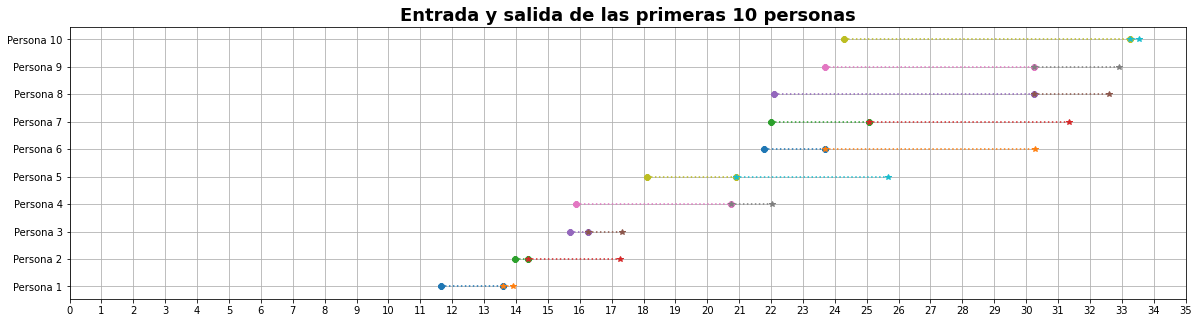

In [39]:
inicio=0
fin=10

fig , ax1 = plt.subplots(figsize=(20,5))
for i in range(inicio,fin):
  x = [llegadas[i], salidas[i]]
  y=[i,i]
  ax1.plot(x, y, "8:")
  w = [llegada_servidor2[i], salida_servidor2[i]]
  ax1.plot(w, y, "*:")

ax1.set_yticks(np.arange(inicio, fin, 1))
labels = ("Persona {}".format(n+1) for n in range(inicio, fin))
ax1.set_yticklabels(labels)

time=[llegadas[inicio:fin], salidas[inicio:fin]]
ax1.set_xticks(np.arange(0, np.max(time)+2, 1))

plt.title("Entrada y salida de las primeras 10 personas", 
          fontdict={'weight': 'bold',
                    'size': 18})

plt.grid()
fig.show()